### Score: `[29]`

Q1. `[11]` good job。

Q2. `[18]` please use different project, missing annotations, and text box

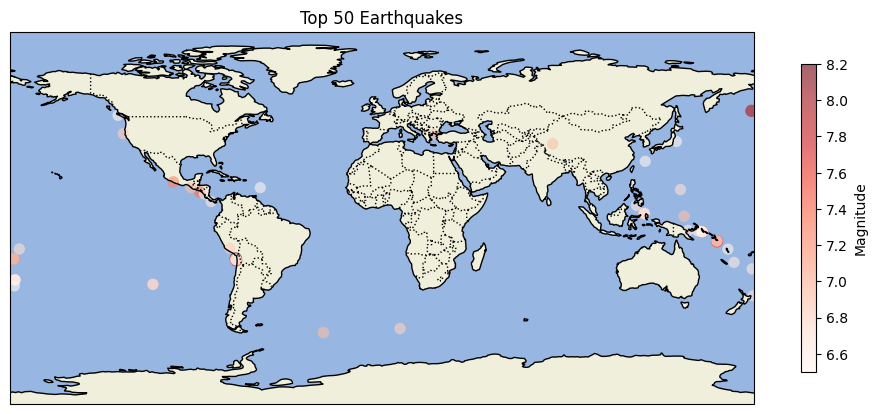

In [2]:
#04.1
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
df = pd.read_csv('../Assignment_rd_common_files/usgs_earthquakes.csv')
df_top50 = df.sort_values(by='mag', ascending=False).head(50)
#绘图
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
#绘制地震点
sizes = df_top50['mag'] * 10
scatter = ax.scatter(df_top50['longitude'], df_top50['latitude'], c=df_top50['mag'], s=sizes, cmap='Reds', alpha=0.6, edgecolor='none')
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Magnitude')
plt.title('Top 50 Earthquakes')
plt.show()

C:\Users\w\AppData\Local\Temp\ipykernel_23764\2854476243.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  xch4 = dataset.variables['xch4'][0, :, :]
d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


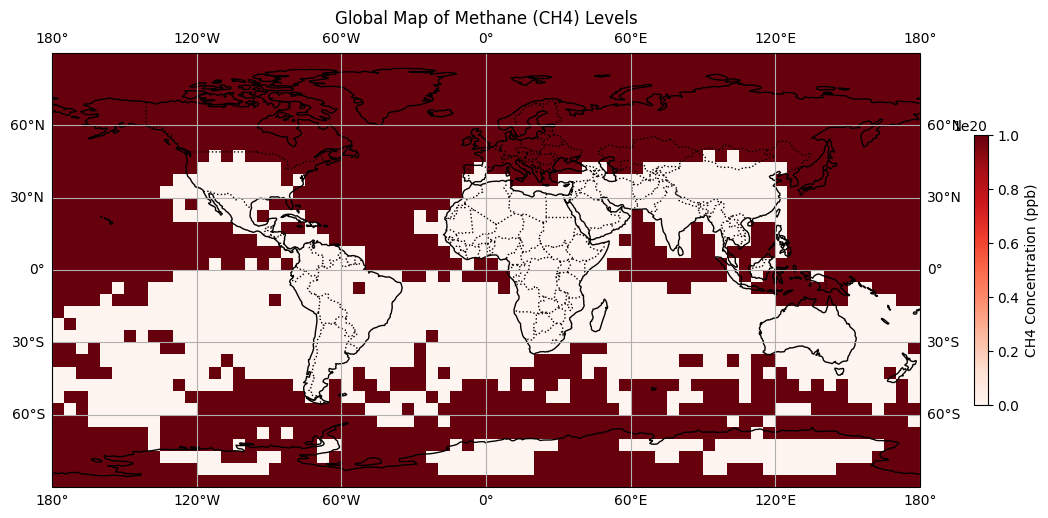

d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


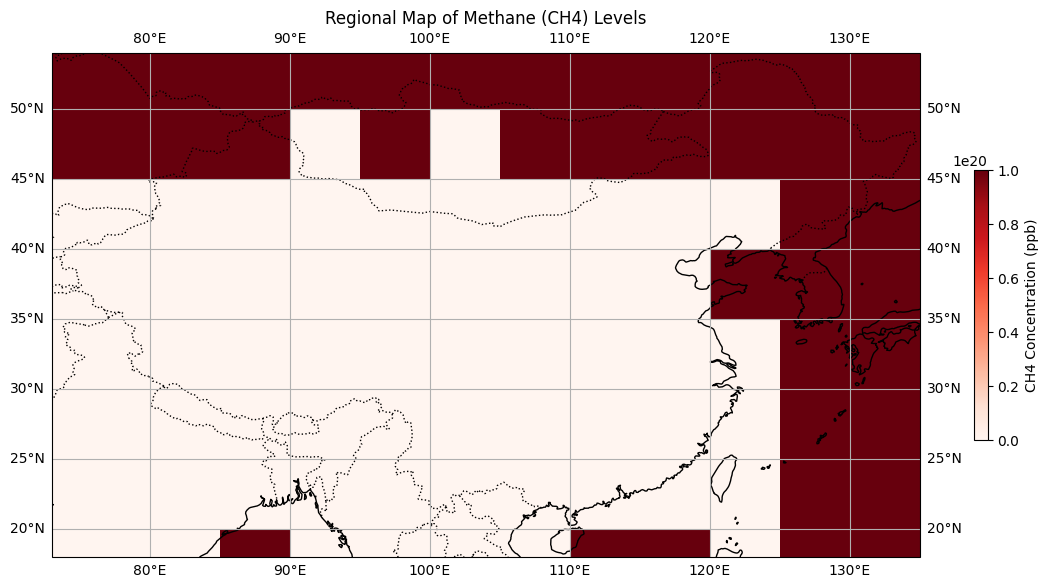

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#用的是作业3甲烷的文件
#4.2.1
dataset = nc.Dataset('../Assignment_rd_common_files/200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc')
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
xch4 = dataset.variables['xch4'][0, :, :] 
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
cbar = ax.pcolormesh(lons, lats, xch4, transform=ccrs.PlateCarree(), cmap='Reds')
plt.colorbar(cbar, ax=ax, orientation='vertical', shrink=0.5, label='CH4 Concentration (ppb)')
plt.title('Global Map of Methane (CH4) Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
#4.2.2
lon_min, lon_max, lat_min, lat_max = 73, 135, 18, 54 #中国的经纬度范围
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
cbar = ax.pcolormesh(lons, lats, xch4, transform=ccrs.PlateCarree(), cmap='Reds')
plt.colorbar(cbar, ax=ax, orientation='vertical', shrink=0.5, label='CH4 Concentration (ppb)')
plt.title('Regional Map of Methane (CH4) Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()